### Importing libraries (for text mining)

In [2]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prateeksharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prateeksharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prateeksharma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [4]:
myfile = open('Key_events_20th_century.txt', encoding='utf-8') 

# Import txt file

In [8]:
with open('Key_events_20th_century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

# Sentence tokenization 

In [11]:
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
# Define the maximum number of sentences to display
max_sentences = 3
# Limit the output to the first 'max_sentences' sentences
limited_sentences = tokenized_sent[:max_sentences]
print(limited_sentences)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Events in the 20th centuryToggle Events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holocaust1.3.12The Nucle

# Word tokenization

In [14]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
# Define the maximum number of words to display
max_words = 40
# Limit the output to the first 'max_words' words
tokenized_word_limit = tokenized_word[:max_words]
print(tokenized_word_limit)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors']


In [15]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4888 samples and 20364 outcomes>


In [18]:
dist_words.most_common(10)

[('.', 1285),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 397),
 ('to', 325),
 ('[', 303),
 (']', 303),
 ('The', 302),
 ('in', 290)]

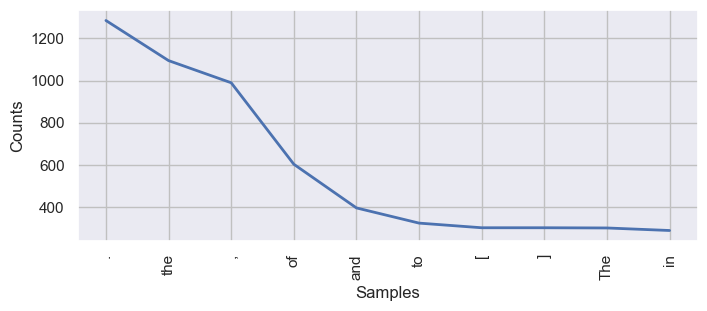

In [20]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

The most common words and punctuation marks are "'", "the" , and ".". However the results are not words at all they are characters and its not very helpful so far. 

## Stopwords

In [24]:
# Defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'has', 'needn', 'for', 'haven', 'don', 'ours', "haven't", 'its', 'further', 'between', 'each', 'mustn', 'an', 'hasn', 'if', 'have', 'll', 'out', 'than', 'so', 'where', 'now', 'why', "couldn't", 'was', "hasn't", 'he', "wasn't", 'ourselves', 'not', 'yours', 'nor', 'under', 'other', 'we', 'is', 'which', 'hers', 'are', 'after', 'him', "doesn't", 'theirs', 'shan', 'will', 'your', 'hadn', 'then', 'again', 'doing', 'weren', 'me', 'just', 'at', 'all', 'too', 'd', 'of', 'wasn', 're', 'didn', 'about', 'once', 'it', 'wouldn', 'i', 'above', 'her', 'won', 'because', "you'll", 'his', 'before', 'any', "you'd", 'she', "needn't", 'ain', 'my', 'couldn', 'himself', 'both', 't', 'that', 'what', "you've", 'same', 'can', 'no', 'those', 'such', 'yourself', 'am', 'mightn', 'do', 'them', 'you', 'should', 'a', 'or', 'how', 's', 'by', 'does', 'few', 'off', 'but', 'having', "shouldn't", 'been', "shan't", 'through', 'this', "didn't", "that'll", 'they', 'here', 'our', 'their', 'aren', 'isn', "weren't", 'the', 'dow

In [26]:
# Removing stopwords in words
filtered_words = []  # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [28]:
# Create a new FreqDist for filtered_words
dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4784 samples and 15703 outcomes>


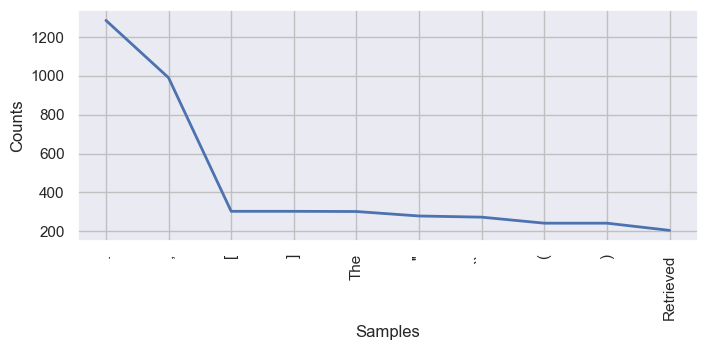

In [30]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

The most common strings are mainly punctuation marks as well as "retrieved" and "war". Will need to remove these common punctuation marks so that the wordlist is more refined. 

In [33]:
# Read the contents of the file while replacing newline characters with spaces
with open('Key_events_20th_century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n',' ')

In [35]:
# Define a regular expression pattern to match unnecessary apostrophes
pattern = r"(?<=\w)'|'(?=\w)"

In [37]:
# Remove unnecessary apostrophes using re.sub()
cleaned_data = re.sub(pattern, "", data)

In [39]:
# Regular expression pattern to remove punctuation while preserving words like "abc’th"
punctuation_pattern = r"(?<!\b\w)'(?!\w)|[^\w\s]|(?<=\w)’(?=\w)"

In [41]:
# Remove unnecessary punctuation marks using re.sub()
cleaned_data = re.sub(punctuation_pattern, " ", cleaned_data)

In [43]:
# Word tokenization
tokenized_word_2 = word_tokenize(cleaned_data)

In [45]:
# Create a new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)

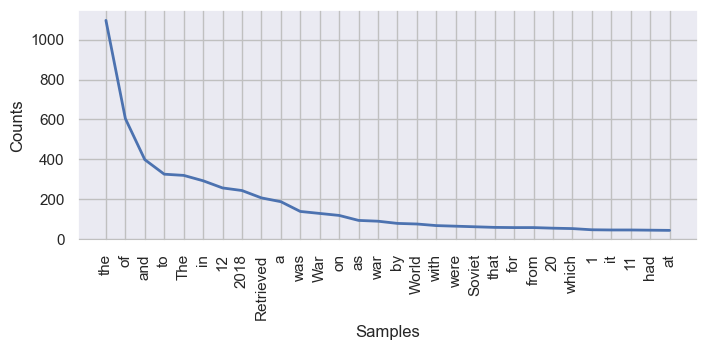

In [47]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

After removing the punctuation marks the results look much better now and can see some common words like "the", "of", "and" as well as some dates and years representing likely a key event. 

In [50]:
dist_words_filter_2.most_common(20)

[('the', 1097),
 ('of', 604),
 ('and', 398),
 ('to', 325),
 ('The', 319),
 ('in', 292),
 ('12', 256),
 ('2018', 243),
 ('Retrieved', 206),
 ('a', 187),
 ('was', 138),
 ('War', 128),
 ('on', 118),
 ('as', 93),
 ('war', 89),
 ('by', 78),
 ('World', 75),
 ('with', 67),
 ('were', 64),
 ('Soviet', 61)]

## POS Tags with TextBlob

In [53]:
new_stopwords = ["and", "the", "'The", "of", "to", "in","'Retrieved"]

In [55]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [57]:
%%time
text = TextBlob(str(filtered))

CPU times: user 12 ms, sys: 1.04 ms, total: 13.1 ms
Wall time: 12.5 ms


In [59]:
tags_list = text.tags
# Define the maximum number of tags to display
max_tags = 5
# Limit the output to the first 'max_tags' tags
tags_list_limit = tags_list[:max_tags]
tags_list_limit

[('[', 'JJ'), ("'Key", 'NNP'), ("'", 'POS'), ("'events", 'NNS'), ("'", 'POS')]

In [60]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

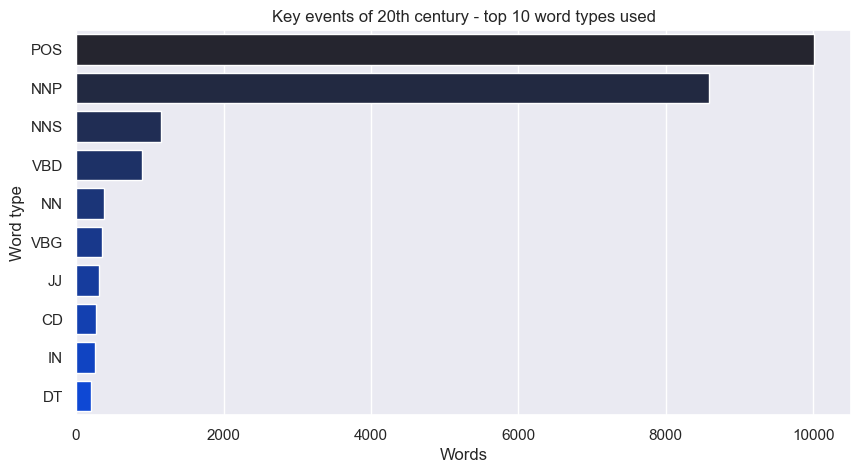

In [61]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key events of 20th century - top 10 word types used")

This bar chart displays the top 10 types of words used in discussions or writings about key events of the 20th century. It represents different parts of speech (POS) such as nouns (NN, NNP, NNS), verbs (VBD, VBG), adjectives (JJ), prepositions (IN), and determiners (DT). The x-axis shows the frequency of these word types. The most frequent word type is proper nouns (NNP), followed by plural nouns (NNS) and singular nouns (NN).

#### Nouns

In [64]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [65]:
# Remove apostrophes from 'Word' column
top15['Word'] = top15['Word'].str.replace("'", "")

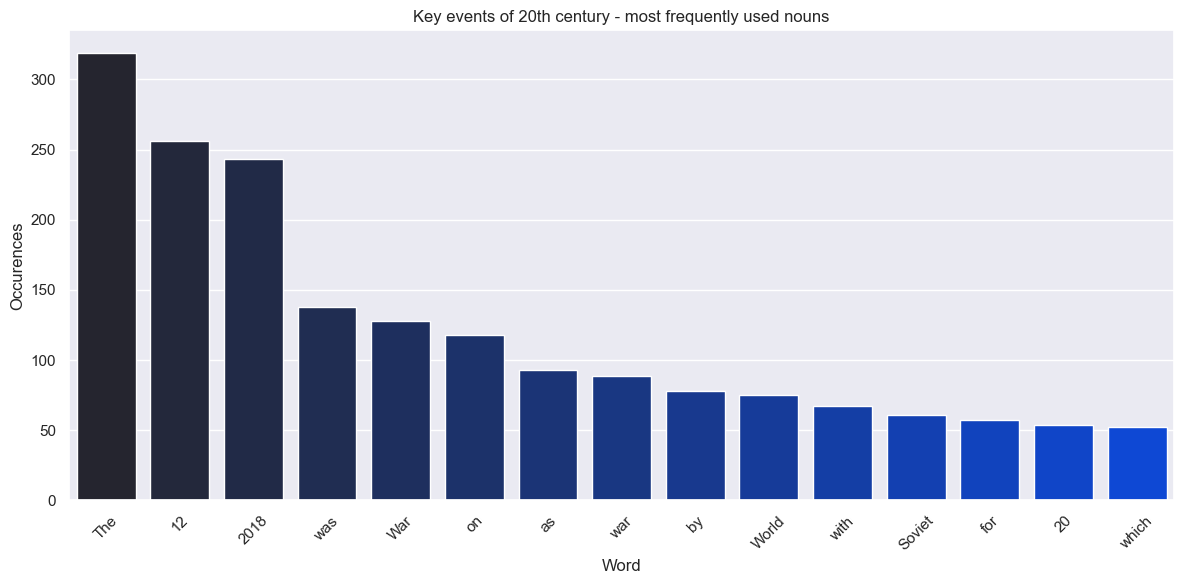

In [66]:
plt.figure(figsize=(12, 6))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Key events of 20th century - most frequently used nouns")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

This bar chart illustrates the most frequently used nouns in texts related to key events of the 20th century. Words like "War," "world," and "World" appear most frequently, indicating a focus on conflicts, global affairs, and specific geopolitical entities such as the Soviet Union.

#### Verbs

In [69]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(10, 'Occurences')

In [70]:
# Remove apostrophes from 'Word' column
top15['Word'] = top15['Word'].str.replace("'", "")

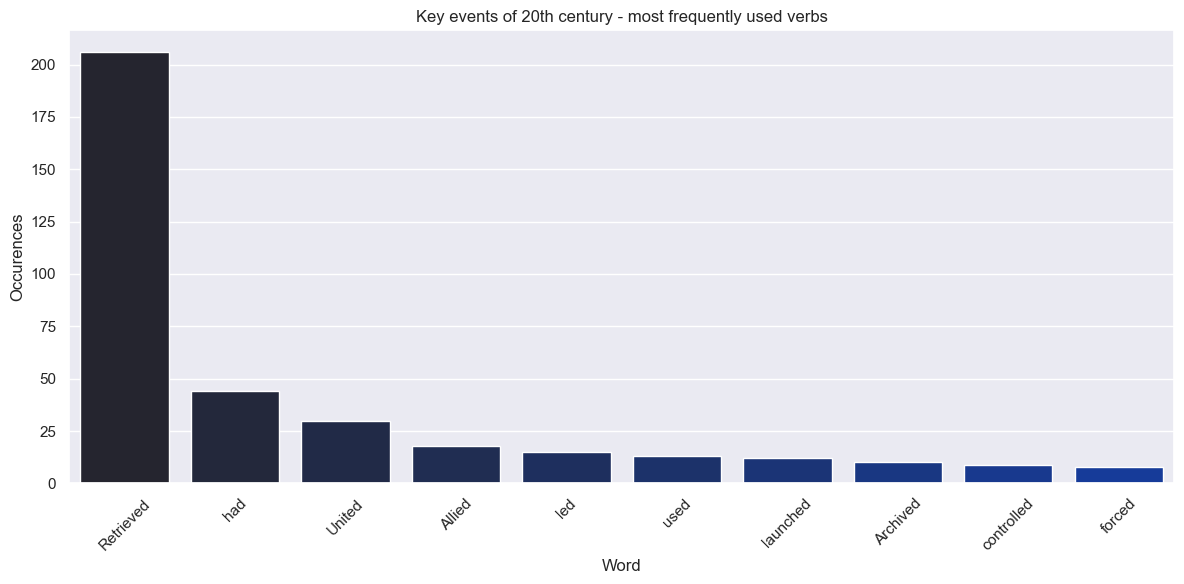

In [71]:
plt.figure(figsize=(12, 6))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Key events of 20th century - most frequently used verbs")
    plt.xticks(rotation=45)  
    plt.tight_layout()

This visualization shows the most commonly used verbs in discussions of 20th-century key events. The verb "retrieved" is the most frequent, followed by "unified" and "allied," suggesting themes of recovery, unification, and alliances in historical narratives.

#### Adjectives

In [74]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [75]:
# Remove apostrophes from 'Word' column
top15['Word'] = top15['Word'].str.replace("'", "")

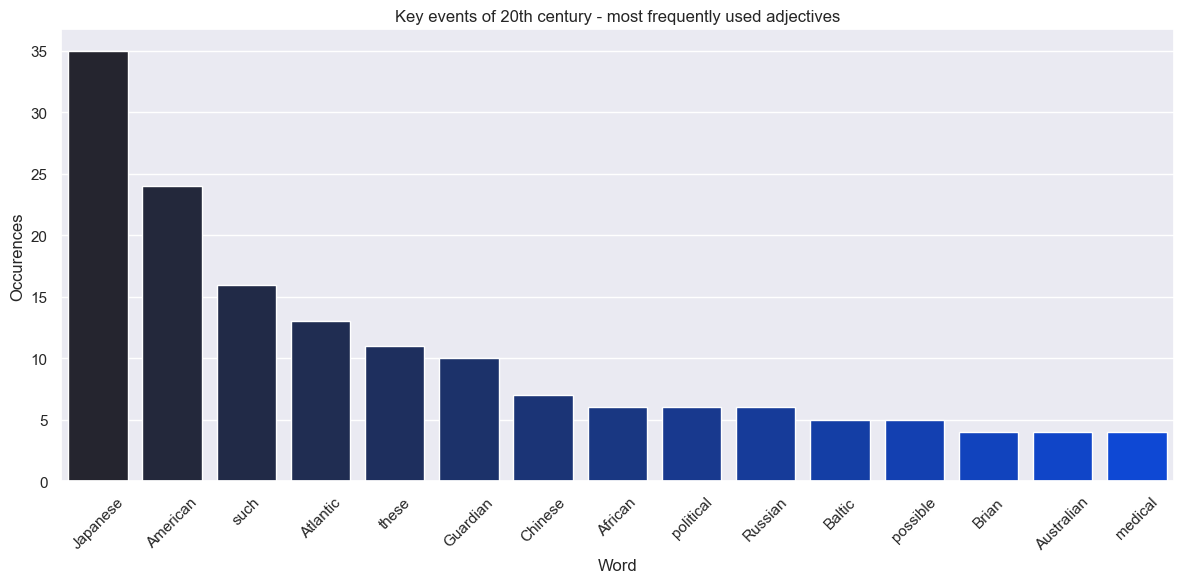

In [76]:
plt.figure(figsize=(12, 6))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Key events of 20th century - most frequently used adjectives")
    plt.xticks(rotation=45)  
    plt.tight_layout()

This bar chart depicts the most frequently used adjectives in texts about the 20th century's key events. Adjectives like "Japanese," "American," and "Atlantic" are prevalent, reflecting the significant roles of these nations and regions in 20th-century history.

In [78]:
# Load the list of countries from the CSV file and clean the names
countries_df = pd.read_csv("countries_list.csv")
countries_df['country_name'] = countries_df['country_name'].str.strip()
countries_list = countries_df['country_name'].tolist()

In [80]:
# Load the text data
with open('Key_events_20th_century.txt', 'r', encoding='utf-8', errors='ignore') as file:
    data = file.read().replace('\n', ' ')

In [82]:
# Convert the text to lowercase for consistent matching
data_lower = data.lower()

In [86]:
# Initialize a Counter to count occurrences of each country name
country_counts = Counter()

In [87]:
# Count occurrences of each country in the text
for country in countries_list:
    count = data_lower.count(country.lower())
    country_counts[country] = count

In [91]:
# Convert the Counter to a DataFrame
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Mentions'])

In [92]:
# Sort the DataFrame by the number of mentions in descending order
country_counts_df = country_counts_df.sort_values(by='Mentions', ascending=False)

In [96]:
# Display the DataFrame
country_counts_df

,Country,Mentions
85,Japan,69
64,Germany,43
185,United States,23
144,Russia,19
191,Vietnam,16
...,...,...
84,Jamaica,0
86,Jordan,0
87,Kazakhstan,0
89,Kiribati,0


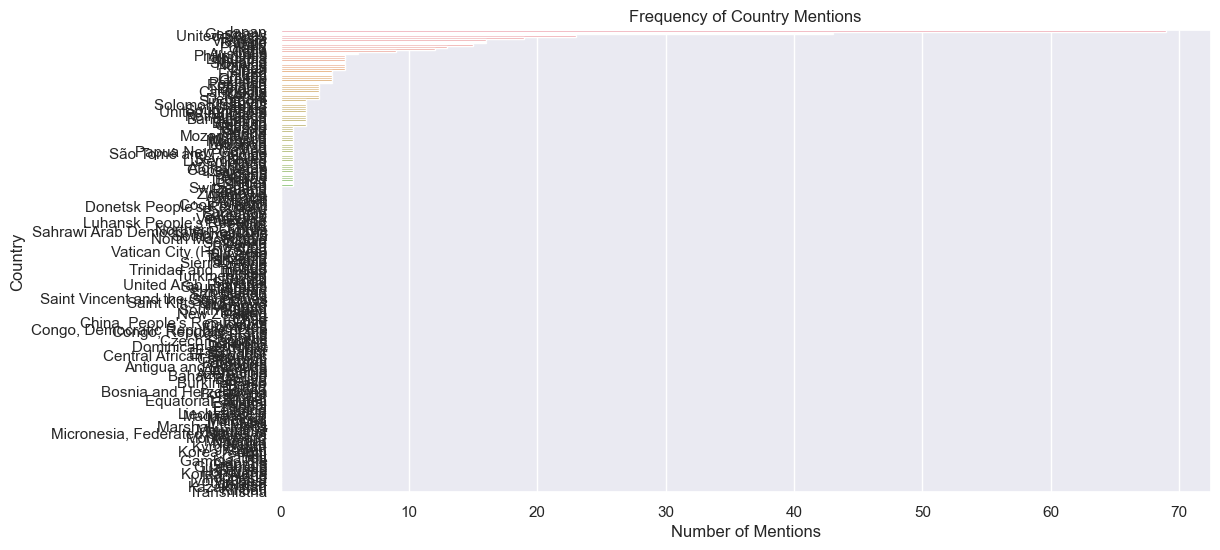

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mentions', y='Country', data=country_counts_df)
plt.title('Frequency of Country Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.show()

The output is very cluttered and difficult to interpret. To solve this issue i will filter the country name frequence to more than or equal to 3. 

In [104]:
# Filter out country mentions with frequency greater than or equal to 3
filtered_country_counts_df = country_counts_df[country_counts_df['Mentions'] >= 3]

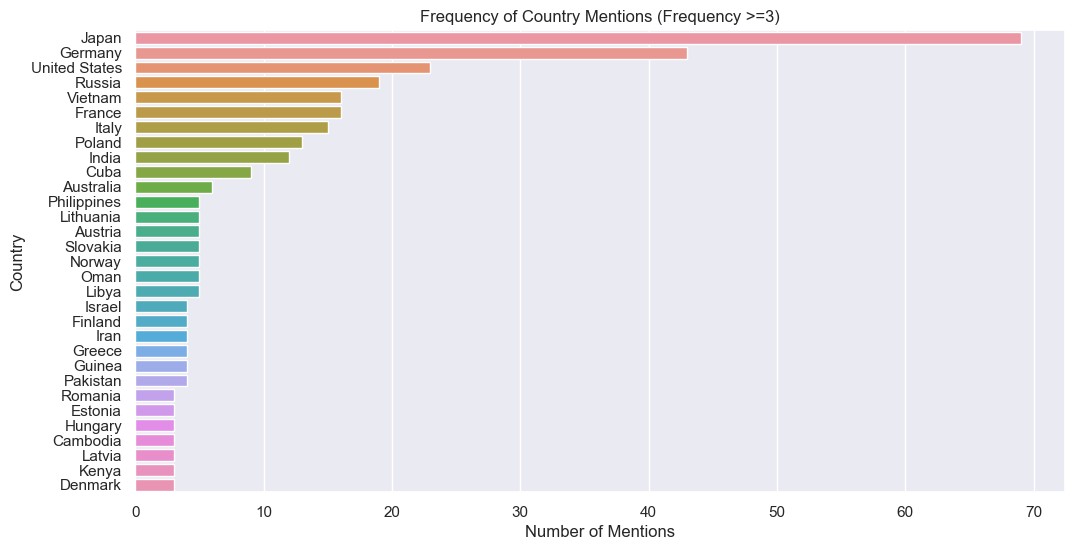

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mentions', y='Country', data=filtered_country_counts_df)
plt.title('Frequency of Country Mentions (Frequency >=3)')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.show()

This horizontal bar chart shows the frequency of mentions of various countries in discussions about the 20th century, with a minimum frequency of three mentions. Japan, Germany, and the United States lead in mentions, which may correlate with their central roles in major historical events during this period.